In [8]:
%pip install h3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.3/801.3 kB 4.0 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
GBIF_PWD = 'TemporaryPasswordForDownload'
GBIF_USER = "bjancso-szabo"
GBIF_EMAIL = 'basil.jancso-szabo@mail.mcgill.ca'

In [1]:
from pygbif import species as species
from pygbif import occurrences as occ

In [93]:
query = { "type": "and",
  "predicates": [
    {
      "type": "within",
      "geometry": "POLYGON((-138.0761719 67.8092445, -149.3261719 65.6220226, -155.5664063 63.8600359, -158.9941406 62.1860139, -161.8066406 61.1432353, -163.3886719 57.751076, -167.2558594 55.9737982, -165.1464844 53.8006508, -160.4003906 55.0280221, -156.4453125 56.7045056, -150.6445313 58.8592235, -143.0859375 58.2632871, -139.1308594 57.1839019, -135.6152344 55.0280221, -133.5326385 52.8284912, -130.8300018 50.5435448, -125.7714844 43.8978924, -124.0136719 34.6693585, -115.0488281 32.694866, -105.5566406 30.7512778, -102.1289063 36.5272948, -105.1171875 46.5588603, -115.3125 55.5286305, -122.2558594 64.9235417, -138.0761719 67.8092445))"
    },
    {
      "type": "equals",
      "key": "DATASET_KEY",
      "value": "50c9509d-22c7-4a22-a47d-8c48425ef4a7"
    },
    {
      "type": "equals",
      "key": "CLASS_KEY",
      "value": "359"
    }

     ]}

occ.download(query, user=GBIF_USER,email=GBIF_EMAIL,pwd=GBIF_PWD)



INFO:Your download key is 0025302-241126133413365


('0025302-241126133413365',
 {'creator': 'bjancso-szabo',
  'notification_address': ['basil.jancso-szabo@mail.mcgill.ca'],
  'sendNotification': True,
  'predicate': {'type': 'and',
   'predicates': [{'type': 'within',
     'geometry': 'POLYGON((-138.0761719 67.8092445, -149.3261719 65.6220226, -155.5664063 63.8600359, -158.9941406 62.1860139, -161.8066406 61.1432353, -163.3886719 57.751076, -167.2558594 55.9737982, -165.1464844 53.8006508, -160.4003906 55.0280221, -156.4453125 56.7045056, -150.6445313 58.8592235, -143.0859375 58.2632871, -139.1308594 57.1839019, -135.6152344 55.0280221, -133.5326385 52.8284912, -130.8300018 50.5435448, -125.7714844 43.8978924, -124.0136719 34.6693585, -115.0488281 32.694866, -105.5566406 30.7512778, -102.1289063 36.5272948, -105.1171875 46.5588603, -115.3125 55.5286305, -122.2558594 64.9235417, -138.0761719 67.8092445))'},
    {'type': 'equals',
     'key': 'DATASET_KEY',
     'value': '50c9509d-22c7-4a22-a47d-8c48425ef4a7'},
    {'type': 'equals', 'k

                  verbatimScientificName
18                           Alces alces
65                 Alces alces andersoni
22                   Alces alces shirasi
64                     Bison bison bison
5            Callospermophilus lateralis
52  Callospermophilus lateralis tescorum
17                         Canis latrans
55                  Canis latrans lestes
25                           Canis lupus
56              Canis lupus occidentalis


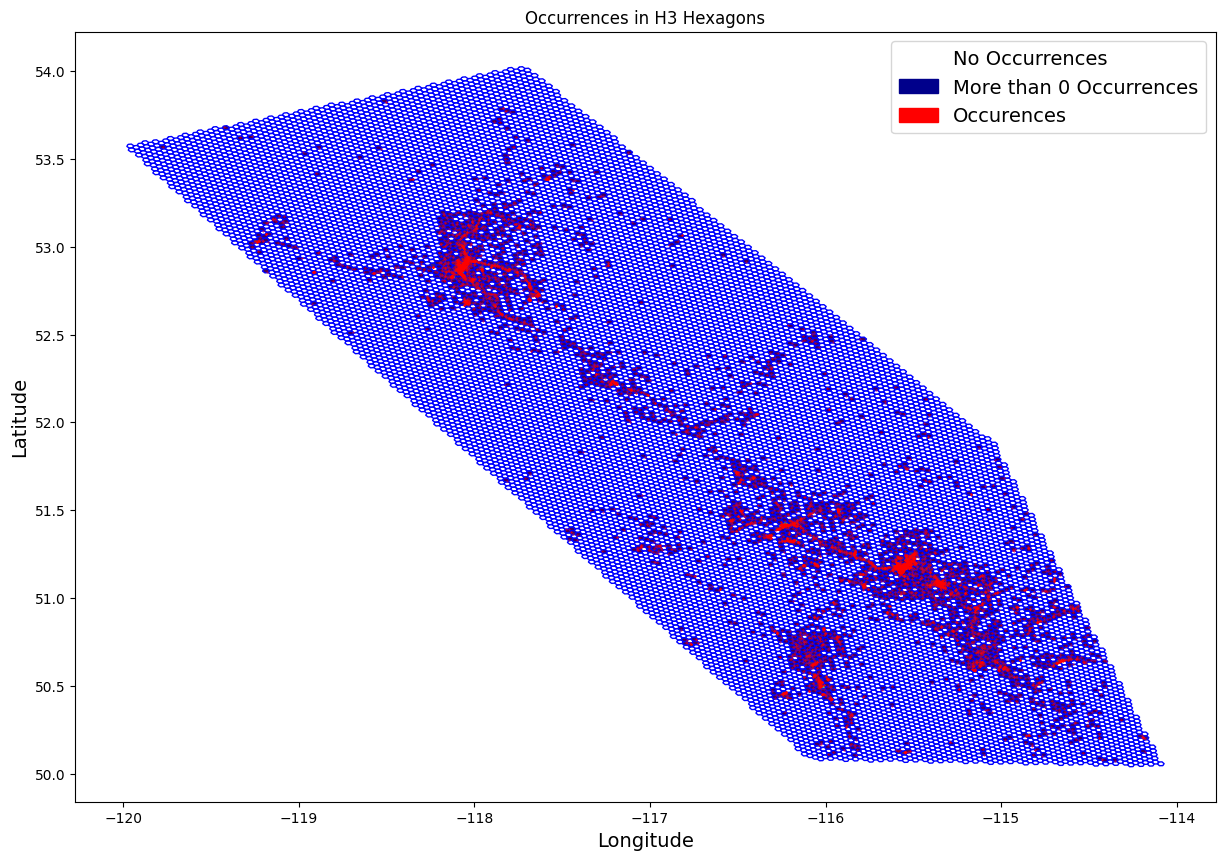

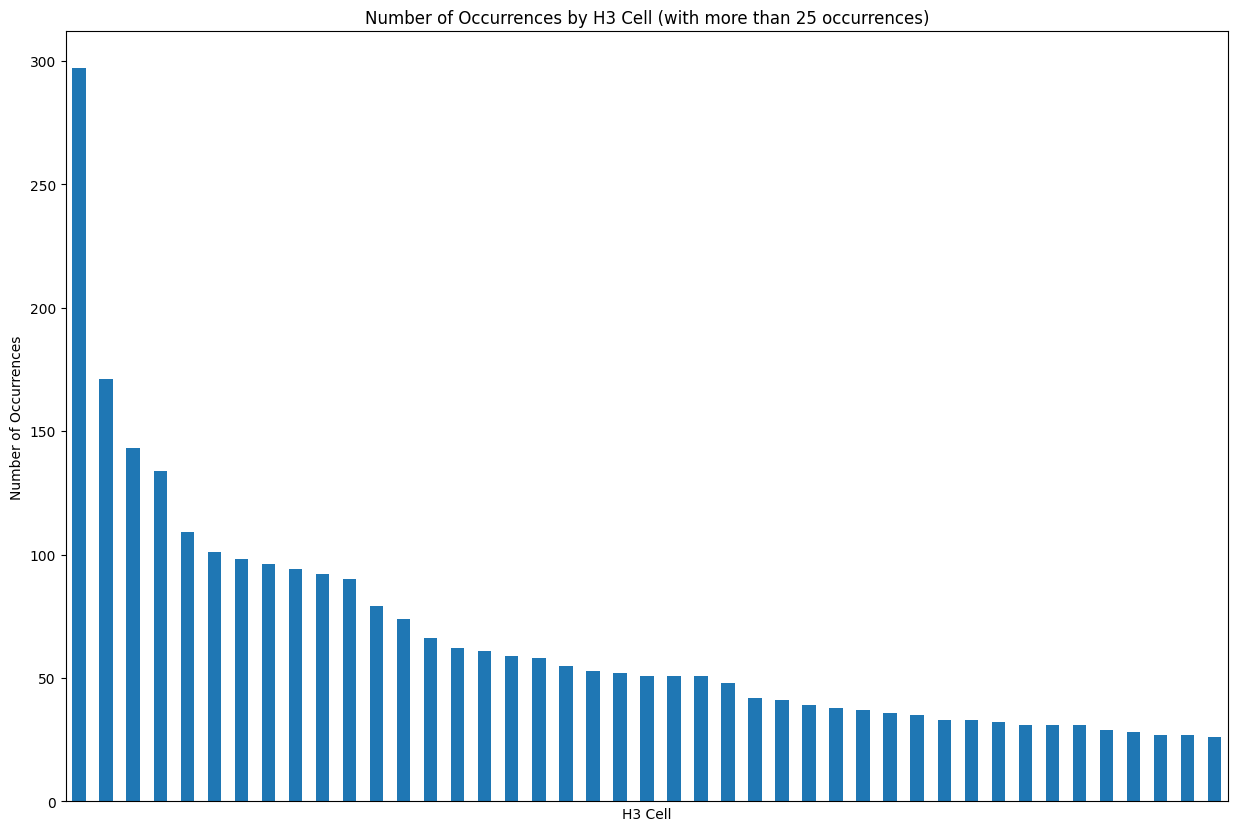

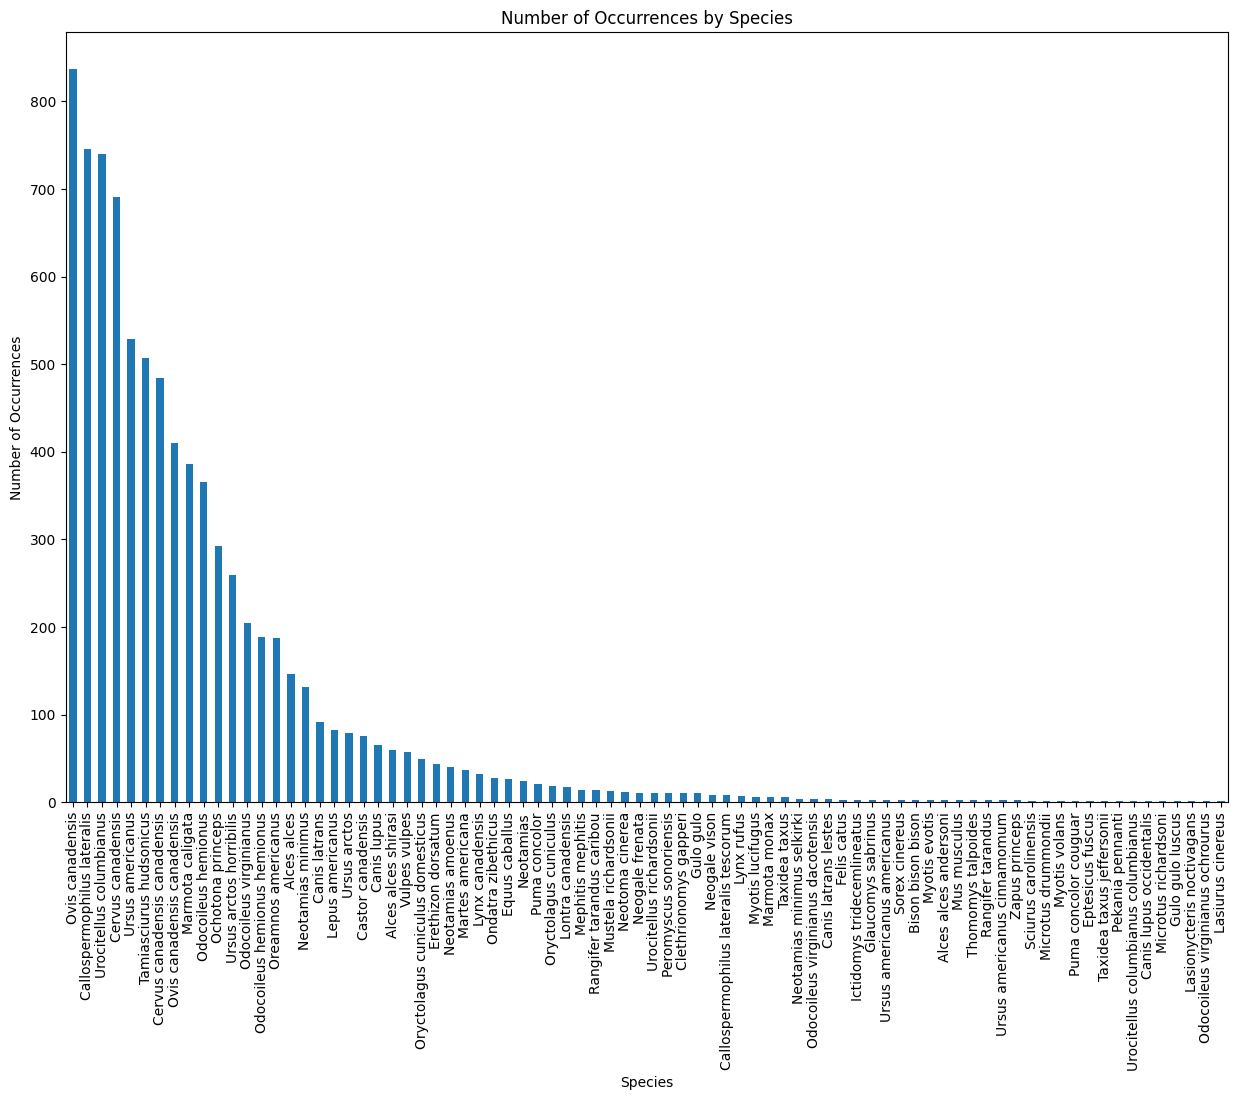

In [ ]:
import h3
import geopandas as gpd
from shapely.geometry import Polygon, Point
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

# Define the polygon
polygon_coords = [
    (50.0437601, -114.0805721),
    (51.8777362, -115.0408459),
    (54.0301079, -117.7137423),
    (53.5716259, -119.9779773),
    (50.0815029, -116.0885596),
    (50.0437601, -114.0805721)
]

# Define other polygon, experimental polygon for all of the rocky mountains
polygon_2 = [
      (67.8092445,-138.0761719),
      (65.6220226,-149.3261719),
      (63.8600359,-155.5664063),
      (62.1860139,-158.9941406),
      (61.1432353,-161.8066406),
      (57.751076,-163.3886719),
      (55.9737982,-167.2558594),
      (53.8006508,-165.1464844),
      (55.0280221,-160.4003906),
      (56.7045056,-156.4453125),
      (58.8592235,-150.6445313),
      (58.2632871,-143.0859375),
      (57.1839019,-139.1308594),
      (55.0280221,-135.6152344),
      (52.8284912,-133.5326385),
      (50.5435448,-130.8300018),
      (43.8978924,-125.7714844),
      (34.6693585,-124.0136719),
      (32.694866,-115.0488281),
      (30.7512778,-105.5566406),
      (36.5272948,-102.1289063),
      (46.5588603,-105.1171875),
      (55.5286305,-115.3125),
      (64.9235417,-122.2558594),
      (67.8092445,-138.0761719)
]


polygon = h3.LatLngPoly(polygon_coords)

# Convert the polygon to H3 hexagons of resolution 9 (approximately 1 km²)
resolution = 7
hexagons = h3.polygon_to_cells(polygon, resolution)

# Read the CSV file into a pandas dataframe
df = pd.read_csv("Dec8Download.csv",
    delimiter='\t',  # Specify the delimiter if it's not a comma
    na_values=['', 'NA', 'null'],  # Specify additional strings to recognize as NA/NaN
    on_bad_lines='skip'  # Skip lines with too many fields
)

df = df[(df['year'] < 2023) & (df['year'] > 2010)]

# Convert the dataframe to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['decimalLongitude'], df['decimalLatitude']))

allSpecies = pd.DataFrame(pd.unique(gdf['verbatimScientificName'])).sort_values(by=0).rename(columns={0: 'verbatimScientificName'})
print(allSpecies.head(10))

# Assign each point to an H3 hexagon
gdf['h3'] = gdf.apply(lambda row: h3.latlng_to_cell(row['decimalLatitude'], row['decimalLongitude'], resolution), axis=1)

# Filter the points based on the H3 hexagons
filtered_gdf = gdf[gdf['h3'].isin(hexagons)]

# Plot the results
fig, ax = plt.subplots(figsize=(15, 10))
hex_counts = filtered_gdf['h3'].value_counts()

# Plot the hexagons with color based on the number of occurrences
hex_polygons = [Polygon([(lng, lat) for lat, lng in h3.cell_to_boundary(hexagon)]) for hexagon in hexagons]
hex_colors = [plt.cm.viridis(2 * hex_counts.get(hexagon, 0) / max(hex_counts)) if hex_counts.get(hexagon, 0) > 0 else 'none' for hexagon in hexagons]

gdf_hex = gpd.GeoDataFrame({'geometry': hex_polygons, 'color': hex_colors})
gdf_hex.plot(ax=ax, edgecolor='blue', facecolor=gdf_hex['color'])

# Plot the points
filtered_gdf.plot(ax=ax, color='red', markersize=0.1)

plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('Occurrences in H3 Hexagons')
# Add a legend
import matplotlib.patches as mpatches

# Create a patch for the legend
none_patch = mpatches.Patch(color='none', label='No Occurrences')
presence_patch = mpatches.Patch(color='darkblue', label='More than 0 Occurrences')
absence_patch = mpatches.Patch(color='red', label='Occurences')

# Add the legend to the plot
plt.legend(handles=[none_patch, presence_patch, absence_patch], loc='upper right', fontsize=14)
plt.show()

# Plot number of occurrences by H3 cell as a bar graph
hex_counts_sorted = hex_counts.sort_values(ascending=False)
hex_counts_sorted[hex_counts_sorted > 25].plot(kind='bar', figsize=(15, 10))
plt.xlabel('H3 Cell')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences by H3 Cell (with more than 25 occurrences)')
#Don't label the x-axis with the H3 cell values
plt.xticks([])
plt.show()

# Plot number of occurrences by species as a bar graph
species_counts = filtered_gdf['verbatimScientificName'].value_counts()
species_counts.plot(kind='bar', figsize=(15, 10))
plt.xlabel('Species')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences by Species')
plt.show()

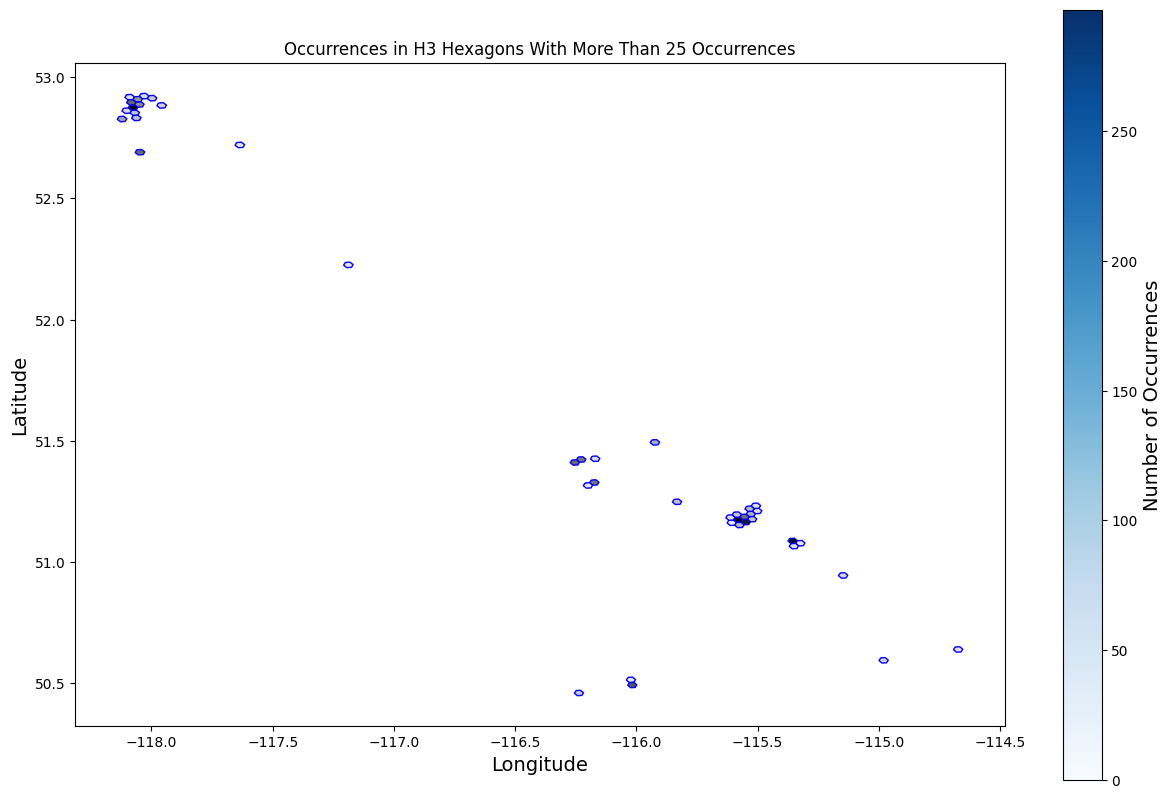

In [174]:
# Plot the results
fig, ax = plt.subplots(figsize=(15, 10))
hex_counts = filtered_gdf['h3'].value_counts()
# Filter hexagons based on the number of occurrences
filtered_hexagons = [hexagon for hexagon in hexagons if hex_counts.get(hexagon, 0) > 25]
# Plot the hexagons with color based on the number of occurrences
hex_polygons = [Polygon([(lng, lat) for lat, lng in h3.cell_to_boundary(hexagon)]) for hexagon in filtered_hexagons]
hex_colors = [plt.cm.Greys(2 * hex_counts.get(hexagon, 0) / max(hex_counts)) if hex_counts.get(hexagon, 0) > 0 else 'none' for hexagon in filtered_hexagons]

gdf_hex = gpd.GeoDataFrame({'geometry': hex_polygons, 'color': hex_colors})
gdf_hex.plot(ax=ax, edgecolor='blue', facecolor=gdf_hex['color'])

# Plot the points
#iltered_gdf.plot(ax=ax, color='red', markersize=5)

plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('Occurrences in H3 Hexagons With More Than 25 Occurrences')

# Add a color bar to show the gradient of occurrences
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=max(hex_counts)))
sm._A = []
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Number of Occurrences', fontsize=14)

plt.show()

In [175]:
# Create a dictionary to store occurrences for each hexagon
hexagon_occurrences = pd.DataFrame()

filtered_gdf = filtered_gdf.sort_values(by='verbatimScientificName')
print(allSpecies)

# Iterate over each hexagon in filtered_hexagons
for hexagon in filtered_hexagons:
    # Filter the occurrences within the current hexagon
    occurrences_in_hexagon = filtered_gdf[filtered_gdf['h3'] == hexagon].copy()
    # For each species, create a sum of occurrences, excluding any that happen in the same month and year
    
    occurrences_in_hexagon['monthYeah'] = occurrences_in_hexagon['month'].astype(str) + "/" + occurrences_in_hexagon['year'].astype(str)

    # Create dataframe with species and monthYear
    species_monthYear = occurrences_in_hexagon[['verbatimScientificName', 'monthYeah']]

    # Sum the number of occurrences for each species for each unique monthYear
    species_monthYear = species_monthYear.groupby(['verbatimScientificName', 'monthYeah']).size().reset_index(name='counts')
    species_monthYear['counts'] = species_monthYear['counts'].apply(lambda x: 1 if x > 0 else 0)

    # Create columns where each column is a unique monthYear and each row is a species
    species_monthYear = species_monthYear.pivot(index='verbatimScientificName', columns='monthYeah', values='counts').fillna(0)

    # Add in remaining species from allSpecies, and fill species not already in species_monthYear with 0
    species_monthYear = species_monthYear.reindex(allSpecies['verbatimScientificName']).fillna(0)

    # Calculate encounter rate
    encounter_rate = species_monthYear.sum(axis=1) / (len(species_monthYear.columns) - 1)
    
    # Store the occurrences in the dictionary
    hexagon_occurrences[hexagon] = encounter_rate

# Reset the index to have verbatimScientificName as a column
hexagon_occurrences.reset_index(inplace=True)

#print(hexagon_occurrences.head(10))
#print(hexagon_occurrences.columns)


         verbatimScientificName
18                  Alces alces
65        Alces alces andersoni
22          Alces alces shirasi
64            Bison bison bison
5   Callospermophilus lateralis
..                          ...
48  Ursus americanus cinnamomum
7                  Ursus arctos
2       Ursus arctos horribilis
16                Vulpes vulpes
24               Zapus princeps

[80 rows x 1 columns]


8712f1254ffffff    0.043478
8712c1016ffffff    0.038462
8712c1cc9ffffff    0.058140
8712f1adaffffff    0.038462
8712c11b3ffffff    0.058824
8712c11b0ffffff    0.032258
8712f1373ffffff    0.240000
8712f1370ffffff    0.114754
8712f1364ffffff    0.178571
8712f1361ffffff    0.333333
8712f1355ffffff    0.083333
8712c306effffff    0.153846
8712c12ccffffff    0.200000
8712c1da0ffffff    0.473684
8712c0adbffffff    0.090909
8712c0353ffffff    0.071429
8712c1ccbffffff    0.062500
8712c1cc8ffffff    0.052632
8712f1ad9ffffff    0.074074
8712c11b5ffffff    0.052632
8712c11b2ffffff    0.022222
8712f1375ffffff    0.051282
8712f1372ffffff    0.160000
8712c1194ffffff    0.066667
8712c4cd4ffffff    0.090909
8712c3a8dffffff    0.040000
8712c1ccdffffff    0.129032
8712f1adbffffff    0.100000
8712f1374ffffff    0.055556
8712c1c88ffffff    0.080000
8712c1c5bffffff    0.058824
Name: Ursus americanus, dtype: float64


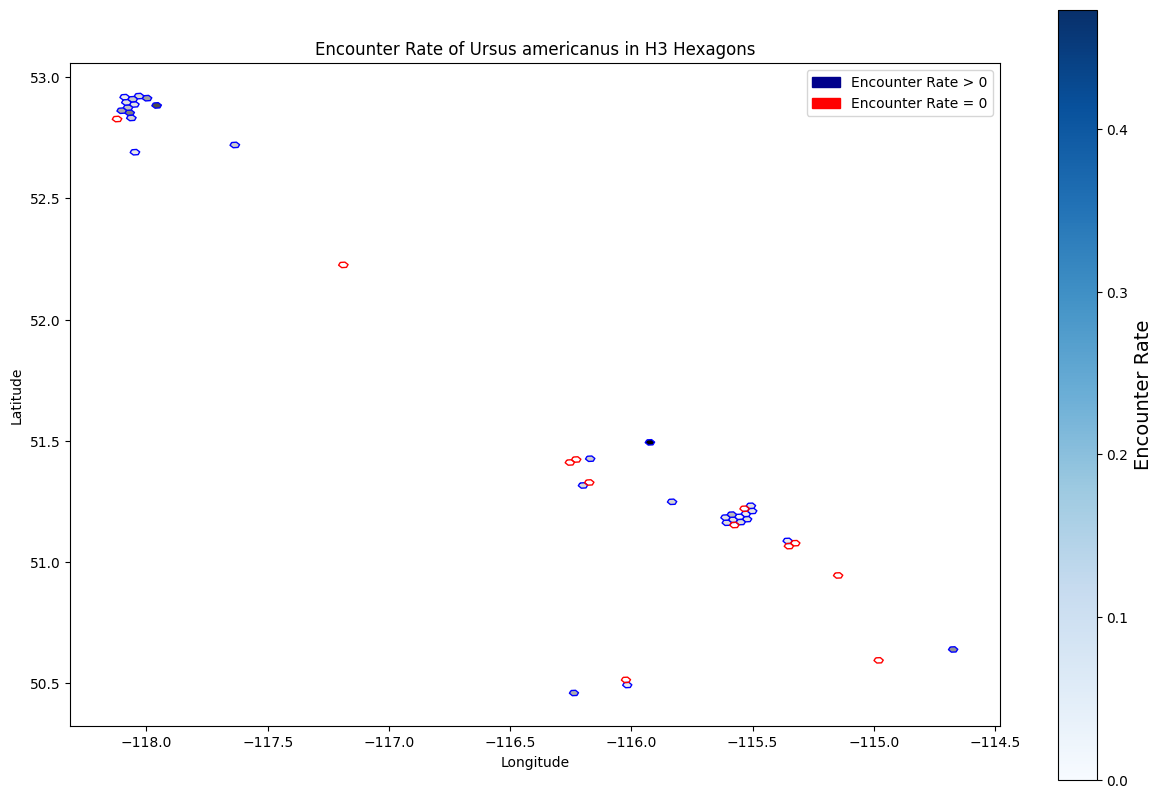

In [176]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

species = 'Ursus americanus'

# Filter the occurrences for a specific species
filtered_columns = hexagon_occurrences.loc[hexagon_occurrences['verbatimScientificName'] == species]

# Drop all columns with 0 values
filtered_columns = filtered_columns.loc[:, (filtered_columns != 0).any(axis=0)]
filtered_columns = filtered_columns.set_index('verbatimScientificName').T.squeeze()
print(filtered_columns)

# Plot the results
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the hexagons with color based on the number of occurrences
hex_polygons = [Polygon([(lng, lat) for lat, lng in h3.cell_to_boundary(hexagon)]) for hexagon in filtered_columns.index]
max_presence = filtered_columns.max()
hex_colors = [plt.cm.binary(filtered_columns.get(hexagon, 0)/ max_presence ) if filtered_columns.get(hexagon, 0) > 0 else 'none' for hexagon in filtered_columns.index]

gdf_hex = gpd.GeoDataFrame({'geometry': hex_polygons, 'color': hex_colors})
gdf_hex.plot(ax=ax, edgecolor='blue', facecolor=gdf_hex['color'])

# Plot hexagons with no presences for the species filled with red
no_presence_hexagons = [hexagon for hexagon in hexagon_occurrences.columns if hexagon != 'verbatimScientificName' and hexagon not in filtered_columns.index]
no_presence_polygons = [Polygon([(lng, lat) for lat, lng in h3.cell_to_boundary(hexagon)]) for hexagon in no_presence_hexagons]

gdf_no_presence = gpd.GeoDataFrame({'geometry': no_presence_polygons})
gdf_no_presence.plot(ax=ax, edgecolor='red', facecolor='none')

# Plot the points
# filtered_gdf[filtered_gdf['h3'].isin(filtered_columns.index)].plot(ax=ax, color='red', markersize=5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Encounter Rate of {species} in H3 Hexagons')

# Add a legend
import matplotlib.patches as mpatches

# Create a patch for the legend
presence_patch = mpatches.Patch(color='darkblue', label='Encounter Rate > 0')
absence_patch = mpatches.Patch(color='red', label='Encounter Rate = 0')
# Add a gradient color bar to the legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=max_presence))
sm._A = []
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Encounter Rate', fontsize=14)

# Add the legend to the plot
plt.legend(handles=[presence_patch, absence_patch], loc='upper right')
plt.show()

In [177]:
hexagon_occurrences.to_csv('hexagon_occurrences_dec10.csv', index=False)